In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
data_folder = 'data'
data_files = os.listdir(data_folder)

data_map = {}
for file in data_files:
    data = pd.read_csv(os.path.join(data_folder, file))
    data_map[file] = data
    
for df in data_map.keys():
    try:
        data_map[df].rename(columns={' Time': 'Time'}, inplace=True)
        data_map[df].rename(columns={' puzzle': 'puzzle'}, inplace=True)
        data_map[df].rename(columns={' Solutionlength': 'Solutionlength'}, inplace=True)
    except:
        pass
    
for df in data_map.keys():
    print(df)

results_A_star.csv
results_A_star_cutoff_22680.0.csv
results_A_star_cutoff_45360.0.csv
results_RTA_star.csv
results_RTA_star_cutoff_22680.0.csv
results_RTA_star_cutoff_45360.0.csv


In [3]:
data_map[list(data_map.keys())[0]].head()

,Algorithm,Heuristic,Status,NodesExpanded,rightDecisions,Solutionlength,Time,puzzle
0,A_Star,hstar,Basic,30,1.0,16,0.000000,102346758
1,A_Star,hstar,Basic,51,1.0,18,0.000000,162358704
2,A_Star,hstar,Basic,72,1.0,21,0.000000,125603847
3,A_Star,hstar,Basic,110,1.0,25,0.015571,378465210
4,A_Star,hstar,Basic,120,1.0,25,0.000000,371506842


In [4]:
heuristics = [
    "hstar",
    "manhattan_distance",
    "linear_conflict",
    "misplaced_tiles",
    "Gaschnig_relaxed_adjacency"
]
statuses = ["Basic", "Optimistic", "Pessimistic"]

In [5]:
def better_mean(data_df, heuristics, column, adjective="better"):
    pes_better = []
    opt_better = []
    bas_better = []
    same = []
    for h in heuristics:
        pes = data_df[(data_df["Heuristic"] == h) & (data_df["Status"] == "Pessimistic")]
        opt = data_df[(data_df["Heuristic"] == h) & (data_df["Status"] == "Optimistic")]
        bas = data_df[(data_df["Heuristic"] == h) & (data_df["Status"] == "Basic")]

        if pes[column].mean() < opt[column].mean() and pes[column].mean() < bas[column].mean():
            pes_better.append(h)
        elif opt[column].mean() < pes[column].mean() and opt[column].mean() < bas[column].mean():
            opt_better.append(h)
        elif bas[column].mean() < pes[column].mean() and bas[column].mean() < opt[column].mean():
            bas_better.append(h)
        else:
            same.append(h)


    print(f"\t\tpessimistic has a {adjective} mean {column} for: {pes_better}")
    print(f"\t\toptimistic has a {adjective} mean {column} for: {opt_better}")
    print(f"\t\tbasic has a better {adjective} {column} for: {bas_better}")
    print(f"\t\t{column} has the same mean for: {same}")
    print()
    

def better_median(data_df, heuristics, column, adjective="better"):
    pes_better = []
    opt_better = []
    bas_better = []
    same = []
    for h in heuristics:
        pes = data_df[(data_df["Heuristic"] == h) & (data_df["Status"] == "Pessimistic")]
        opt = data_df[(data_df["Heuristic"] == h) & (data_df["Status"] == "Optimistic")]
        bas = data_df[(data_df["Heuristic"] == h) & (data_df["Status"] == "Basic")]
        # if pes['NodesExpanded'].mean() is the best, add to pes_better, etc.
        if pes[column].median() < opt[column].median() and pes[column].median() < bas[column].median():
            pes_better.append(h)
        elif opt[column].median() < pes[column].median() and opt[column].median() < bas[column].median():
            opt_better.append(h)
        elif bas[column].median() < pes[column].median() and bas[column].median() < opt[column].median():
            bas_better.append(h)
        else:
            same.append(h)

    print(f"\t\tpessimistic has a {adjective} median {column} for: {pes_better}")
    print(f"\t\toptimistic has a {adjective} median {column} for: {opt_better}")
    print(f"\t\tbasic has a {adjective} median {column} for: {bas_better}")
    print(f"\t\t{column} has the same median for: {same}")
    print()
    
def better_mean_max(data_df, heuristics, column, adjective="better"):
    pes_worse = []
    opt_worse = []
    bas_worse = []
    same = []
    for h in heuristics:
        pes = data_df[(data_df["Heuristic"] == h) & (data_df["Status"] == "Pessimistic")]
        opt = data_df[(data_df["Heuristic"] == h) & (data_df["Status"] == "Optimistic")]
        bas = data_df[(data_df["Heuristic"] == h) & (data_df["Status"] == "Basic")]

        if pes[column].mean() > opt[column].mean() and pes[column].mean() > bas[column].mean():
            pes_worse.append(h)
        elif opt[column].mean() > pes[column].mean() and opt[column].mean() > bas[column].mean():
            opt_worse.append(h)
        elif bas[column].mean() > pes[column].mean() and bas[column].mean() > opt[column].mean():
            bas_worse.append(h)
        else:
            same.append(h)

    print(f"\t\tpessimistic has a {adjective} mean {column} for: {pes_worse}")
    print(f"\t\toptimistic has a {adjective} mean {column} for: {opt_worse}")
    print(f"\t\tbasic has a {adjective} mean {column} for: {bas_worse}")
    print(f"\t\t{column} has the same mean for: {same}")
    print()
    
def better_median_max(data_df, heuristics, column, adjective="better"):
    pes_worse = []
    opt_worse = []
    bas_worse = []
    same = []
    for h in heuristics:
        pes = data_df[(data_df["Heuristic"] == h) & (data_df["Status"] == "Pessimistic")]
        opt = data_df[(data_df["Heuristic"] == h) & (data_df["Status"] == "Optimistic")]
        bas = data_df[(data_df["Heuristic"] == h) & (data_df["Status"] == "Basic")]

        if pes[column].median() > opt[column].median() and pes[column].median() > bas[column].median():
            pes_worse.append(h)
        elif opt[column].median() > pes[column].median() and opt[column].median() > bas[column].median():
            opt_worse.append(h)
        elif bas[column].median() > pes[column].median() and bas[column].median() > opt[column].median():
            bas_worse.append(h)
        else:
            same.append(h)

    print(f"\t\tpessimistic has a {adjective} median {column} for: {pes_worse}")
    print(f"\t\toptimistic has a {adjective} median {column} for: {opt_worse}")
    print(f"\t\tbasic has a {adjective} median {column} for: {bas_worse}")
    print(f"\t\t{column} has the same median for: {same}")
    print()

In [6]:
for name in data_map.keys():
    data = data_map[name]
    print(name)
    print(f"\t Nodes Expanded")
    better_mean(data, heuristics, "NodesExpanded")
    better_median(data, heuristics, "NodesExpanded")
    
    print(f"\t Solution Length")
    better_mean(data, heuristics, "Solutionlength")
    better_median(data, heuristics, "Solutionlength")

    print(f"\t Right Decisions")
    better_mean_max(data, heuristics, "rightDecisions")
    better_median_max(data, heuristics, "rightDecisions")
    


results_A_star.csv
	 Nodes Expanded
		pessimistic has a better mean NodesExpanded for: ['hstar', 'manhattan_distance', 'linear_conflict', 'misplaced_tiles', 'Gaschnig_relaxed_adjacency']
		optimistic has a better mean NodesExpanded for: []
		basic has a better better NodesExpanded for: []
		NodesExpanded has the same mean for: []

		pessimistic has a better median NodesExpanded for: ['hstar', 'linear_conflict', 'misplaced_tiles', 'Gaschnig_relaxed_adjacency']
		optimistic has a better median NodesExpanded for: []
		basic has a better median NodesExpanded for: ['manhattan_distance']
		NodesExpanded has the same median for: []

	 Solution Length
		pessimistic has a better mean Solutionlength for: []
		optimistic has a better mean Solutionlength for: []
		basic has a better better Solutionlength for: ['hstar', 'manhattan_distance', 'linear_conflict', 'misplaced_tiles', 'Gaschnig_relaxed_adjacency']
		Solutionlength has the same mean for: []

		pessimistic has a better median Solutionlengt

In [11]:
data_map_cutoff = {}
data_map_no_cutoff = {}

for key in data_map.keys():
    if "cutoff" in key:
        data_map_cutoff[key] = data_map[key]
    else:
        data_map_no_cutoff[key] = data_map[key]

In [20]:
# Cutoff analysis

for key in data_map.keys():
    data = data_map[key]
    cutoff_value = key.split("_")[-1].split(".")[0]

    # overall mean of nodes expanded
    print(f"{key} - {cutoff_value}")
    print(f"\t Nodes Expanded")
    print(f"\t\tmean: {data['NodesExpanded'].mean()}")
    print(f"\t\tmedian: {data['NodesExpanded'].median()}")
    
    print(f"\t Solution Length")
    print(f"\t\tmean: {data['Solutionlength'].mean()}")
    print(f"\t\tmedian: {data['Solutionlength'].median()}")
    
    print(f"\t Right Decisions")
    print(f"\t\tmean: {data['rightDecisions'].mean()}")
    print(f"\t\tmedian: {data['rightDecisions'].median()}")
    
    print()

results_A_star.csv - star
	 Nodes Expanded
		mean: 7390.4176
		median: 1945.0
	 Solution Length
		mean: 25.153177777777778
		median: 25.0
	 Right Decisions
		mean: 0.9654917287265777
		median: 1.0

results_A_star_cutoff_22680.0.csv - 22680
	 Nodes Expanded
		mean: 7195.583877777778
		median: 1940.0
	 Solution Length
		mean: 25.235004444444446
		median: 25.0
	 Right Decisions
		mean: 0.9644312936881235
		median: 1.0

results_A_star_cutoff_45360.0.csv - 45360
	 Nodes Expanded
		mean: 7286.456617777778
		median: 1941.0
	 Solution Length
		mean: 25.16468888888889
		median: 25.0
	 Right Decisions
		mean: 0.9653265502171587
		median: 1.0

results_RTA_star.csv - star
	 Nodes Expanded
		mean: 4848.113133333333
		median: 2276.0
	 Solution Length
		mean: 339.8963777777778
		median: 196.0
	 Right Decisions
		mean: 0.6547579610238283
		median: 0.5592105263157895

results_RTA_star_cutoff_22680.0.csv - 22680
	 Nodes Expanded
		mean: 4907.5818266666665
		median: 2284.0
	 Solution Length
		mean: 352.6

In [7]:
def grapher_per_col(data_map, column):
    plt.rcParams.update({'font.size': 14})

    fig, axs = plt.subplots(2, 3, figsize=(25, 15))
    
    red_lines = [150000, 300000, 450000]
    blue_lines = [i for i in range(30000, 450000, 30000)]
    green_lines = [i for i in range(10000, 450000, 10000)]
    
    for i, df in enumerate(data_map.keys()):
        col = i // 2
        row = i % 2
        data = data_map[df]
        axs[row, col].plot(data[column])

        for line in green_lines:
            axs[row, col].axvline(x=line, color='green', linestyle='--')
            
        for line in blue_lines:
            axs[row, col].axvline(x=line, color='blue', linestyle='--')
        
        for line in red_lines:
            axs[row, col].axvline(x=line, color='red', linestyle='--')

            
            
        axs[row, col].set_xlabel('Time')
        axs[row, col].set_ylabel(f'{column}')
        axs[row, col].set_title(f'{column} Over Time ({df})')
        axs[row, col].legend()

    plt.tight_layout()
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


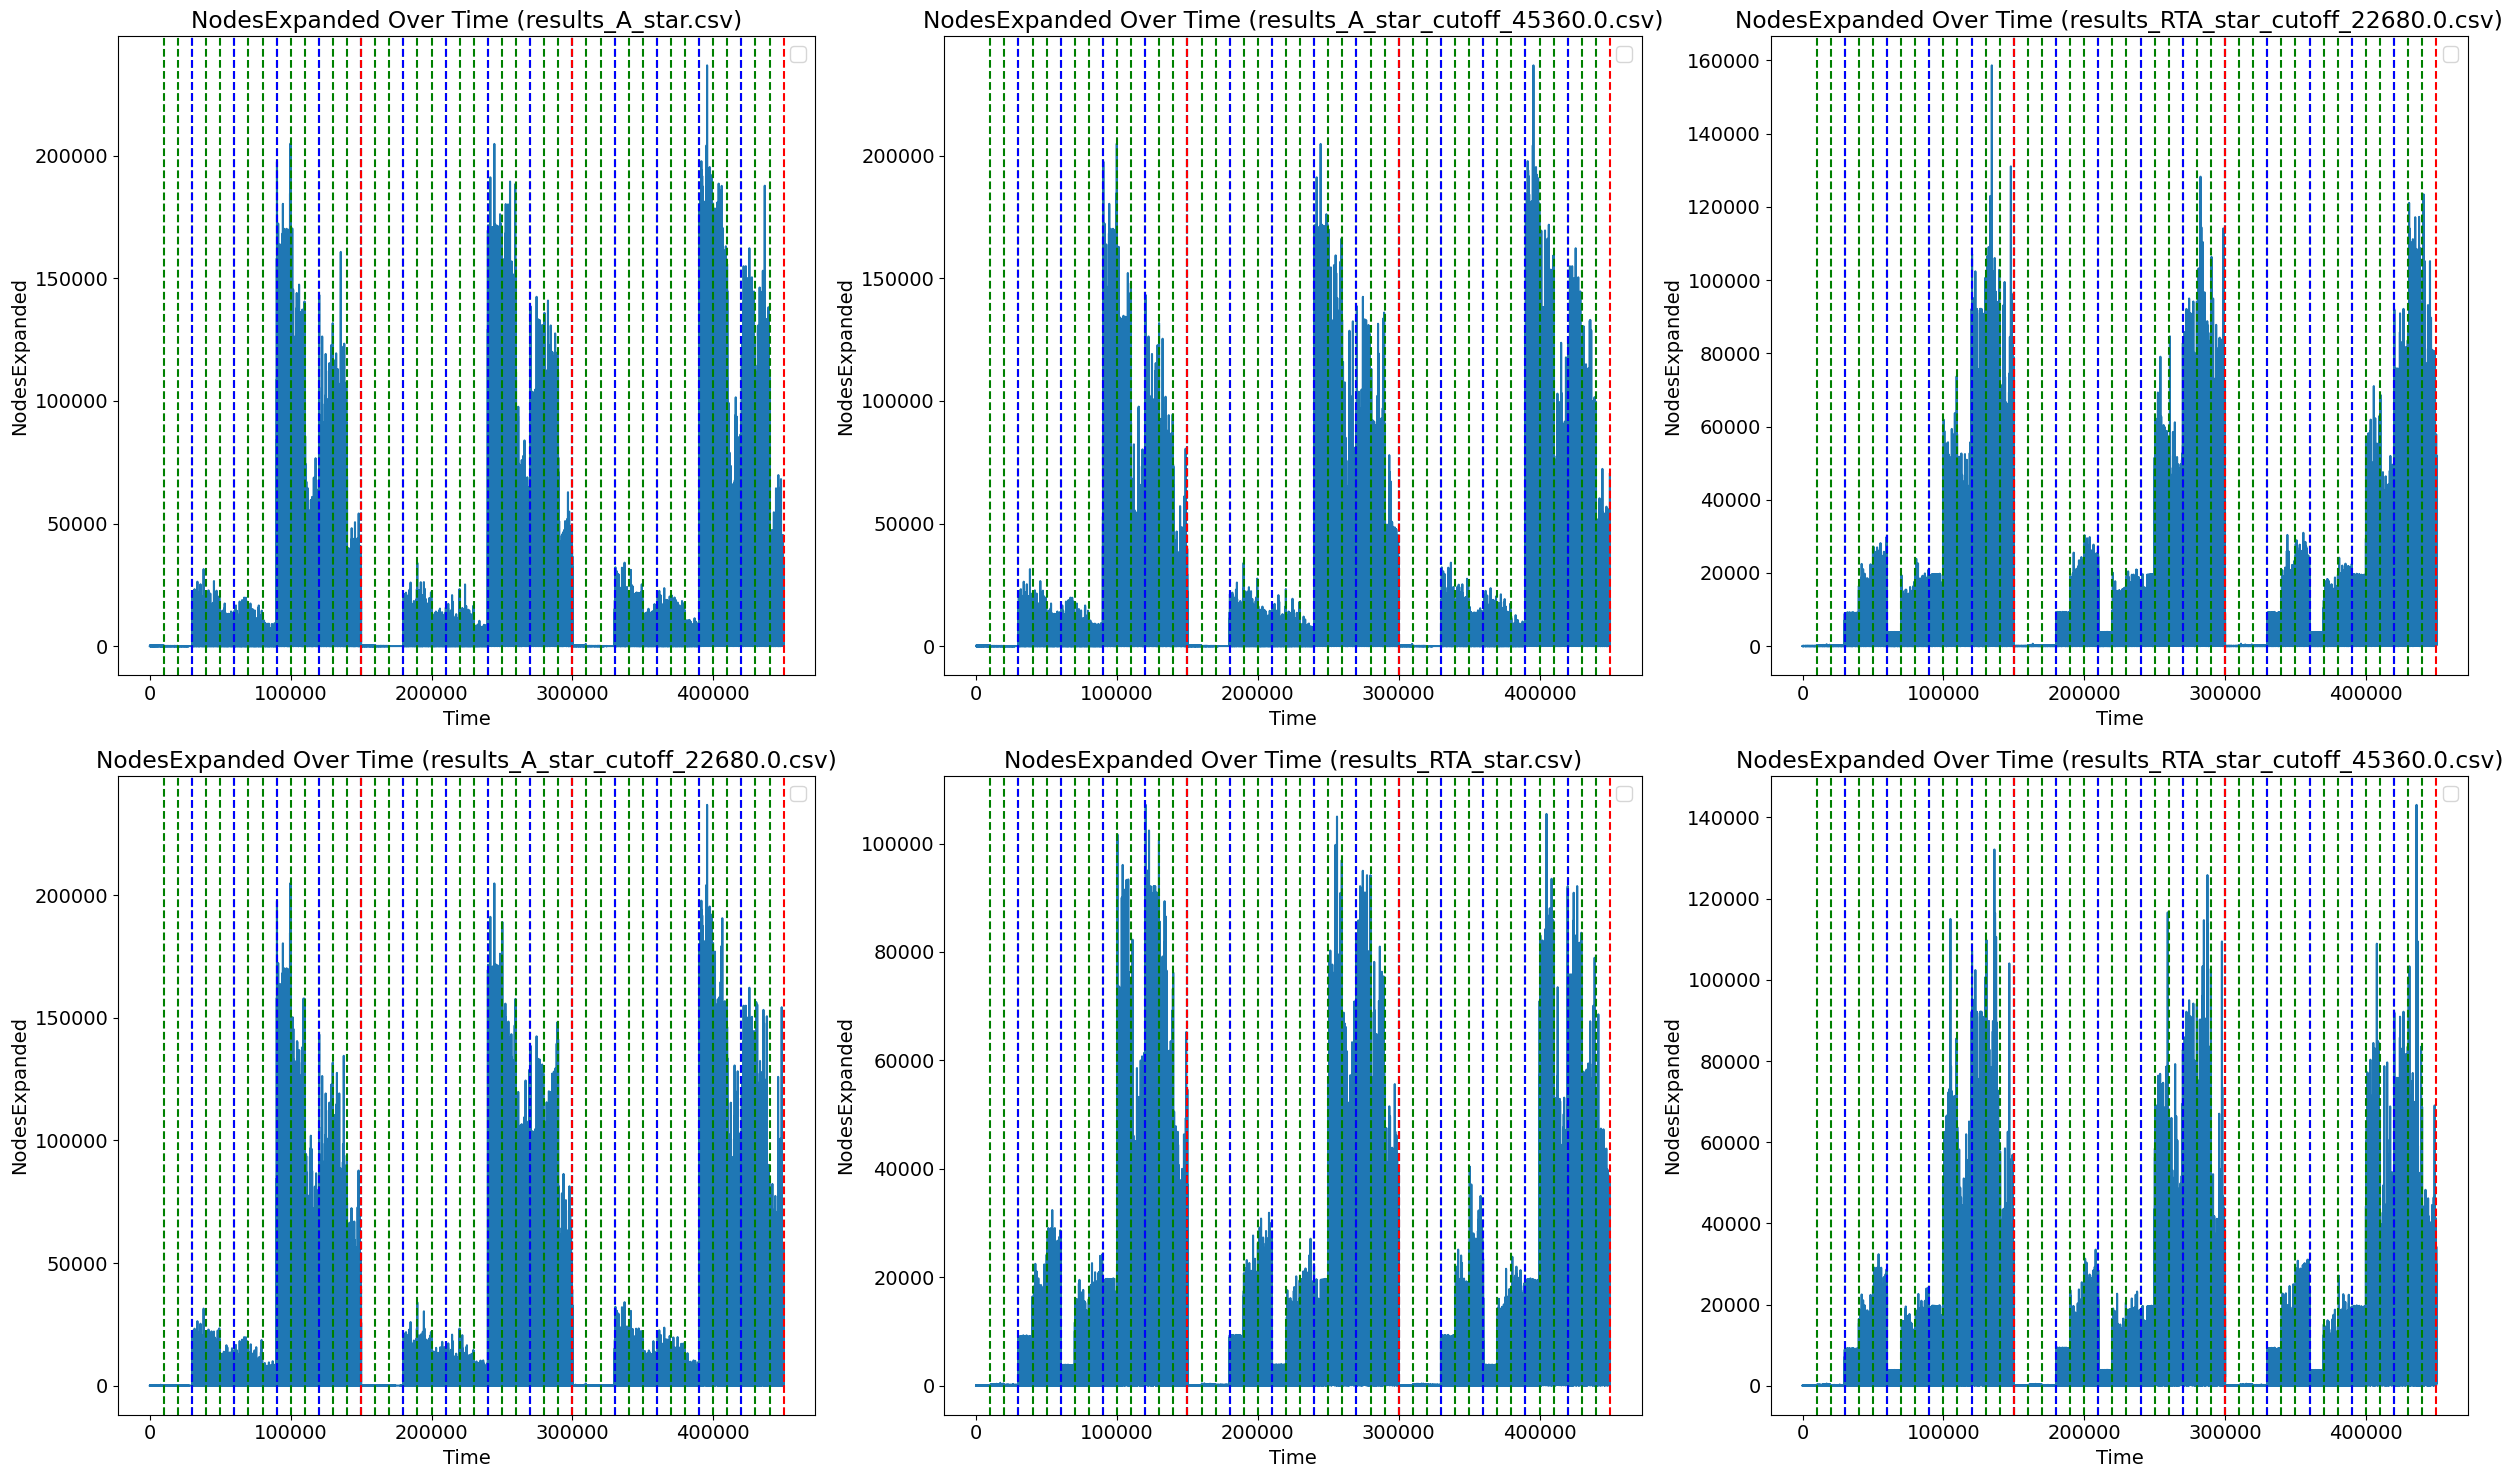

In [8]:
grapher_per_col(data_map, 'NodesExpanded')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


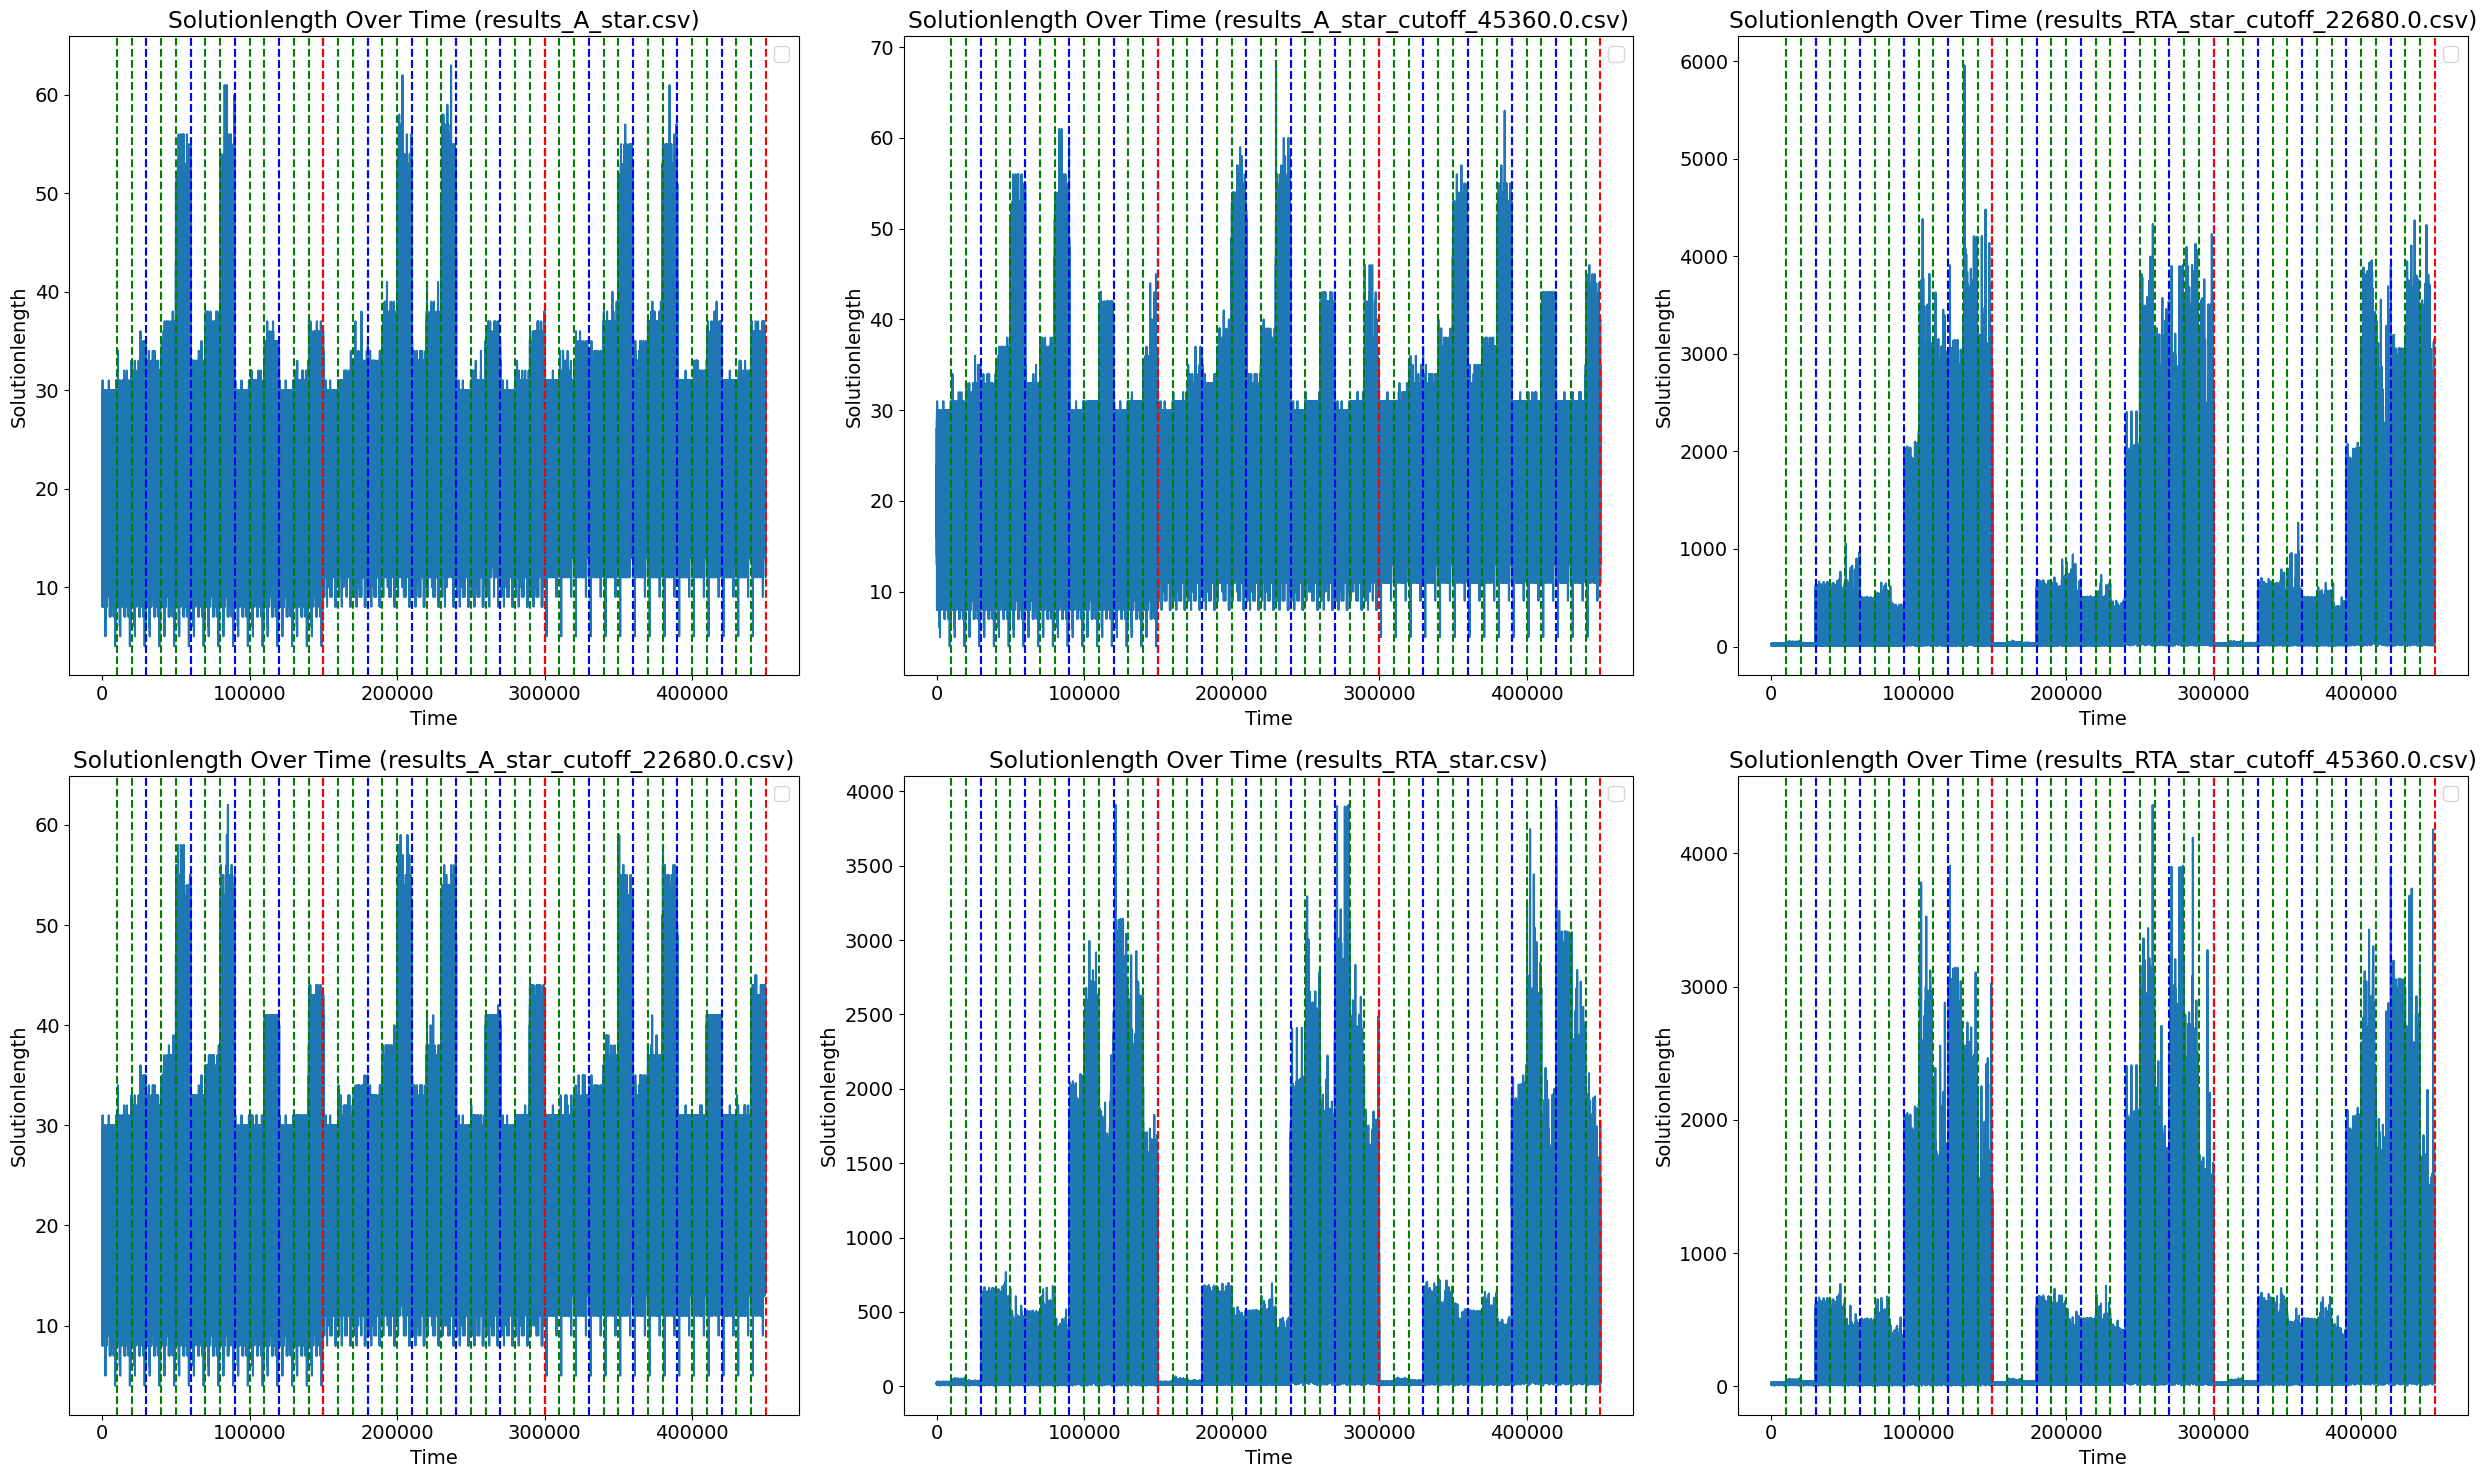

In [9]:
grapher_per_col(data_map, 'Solutionlength')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


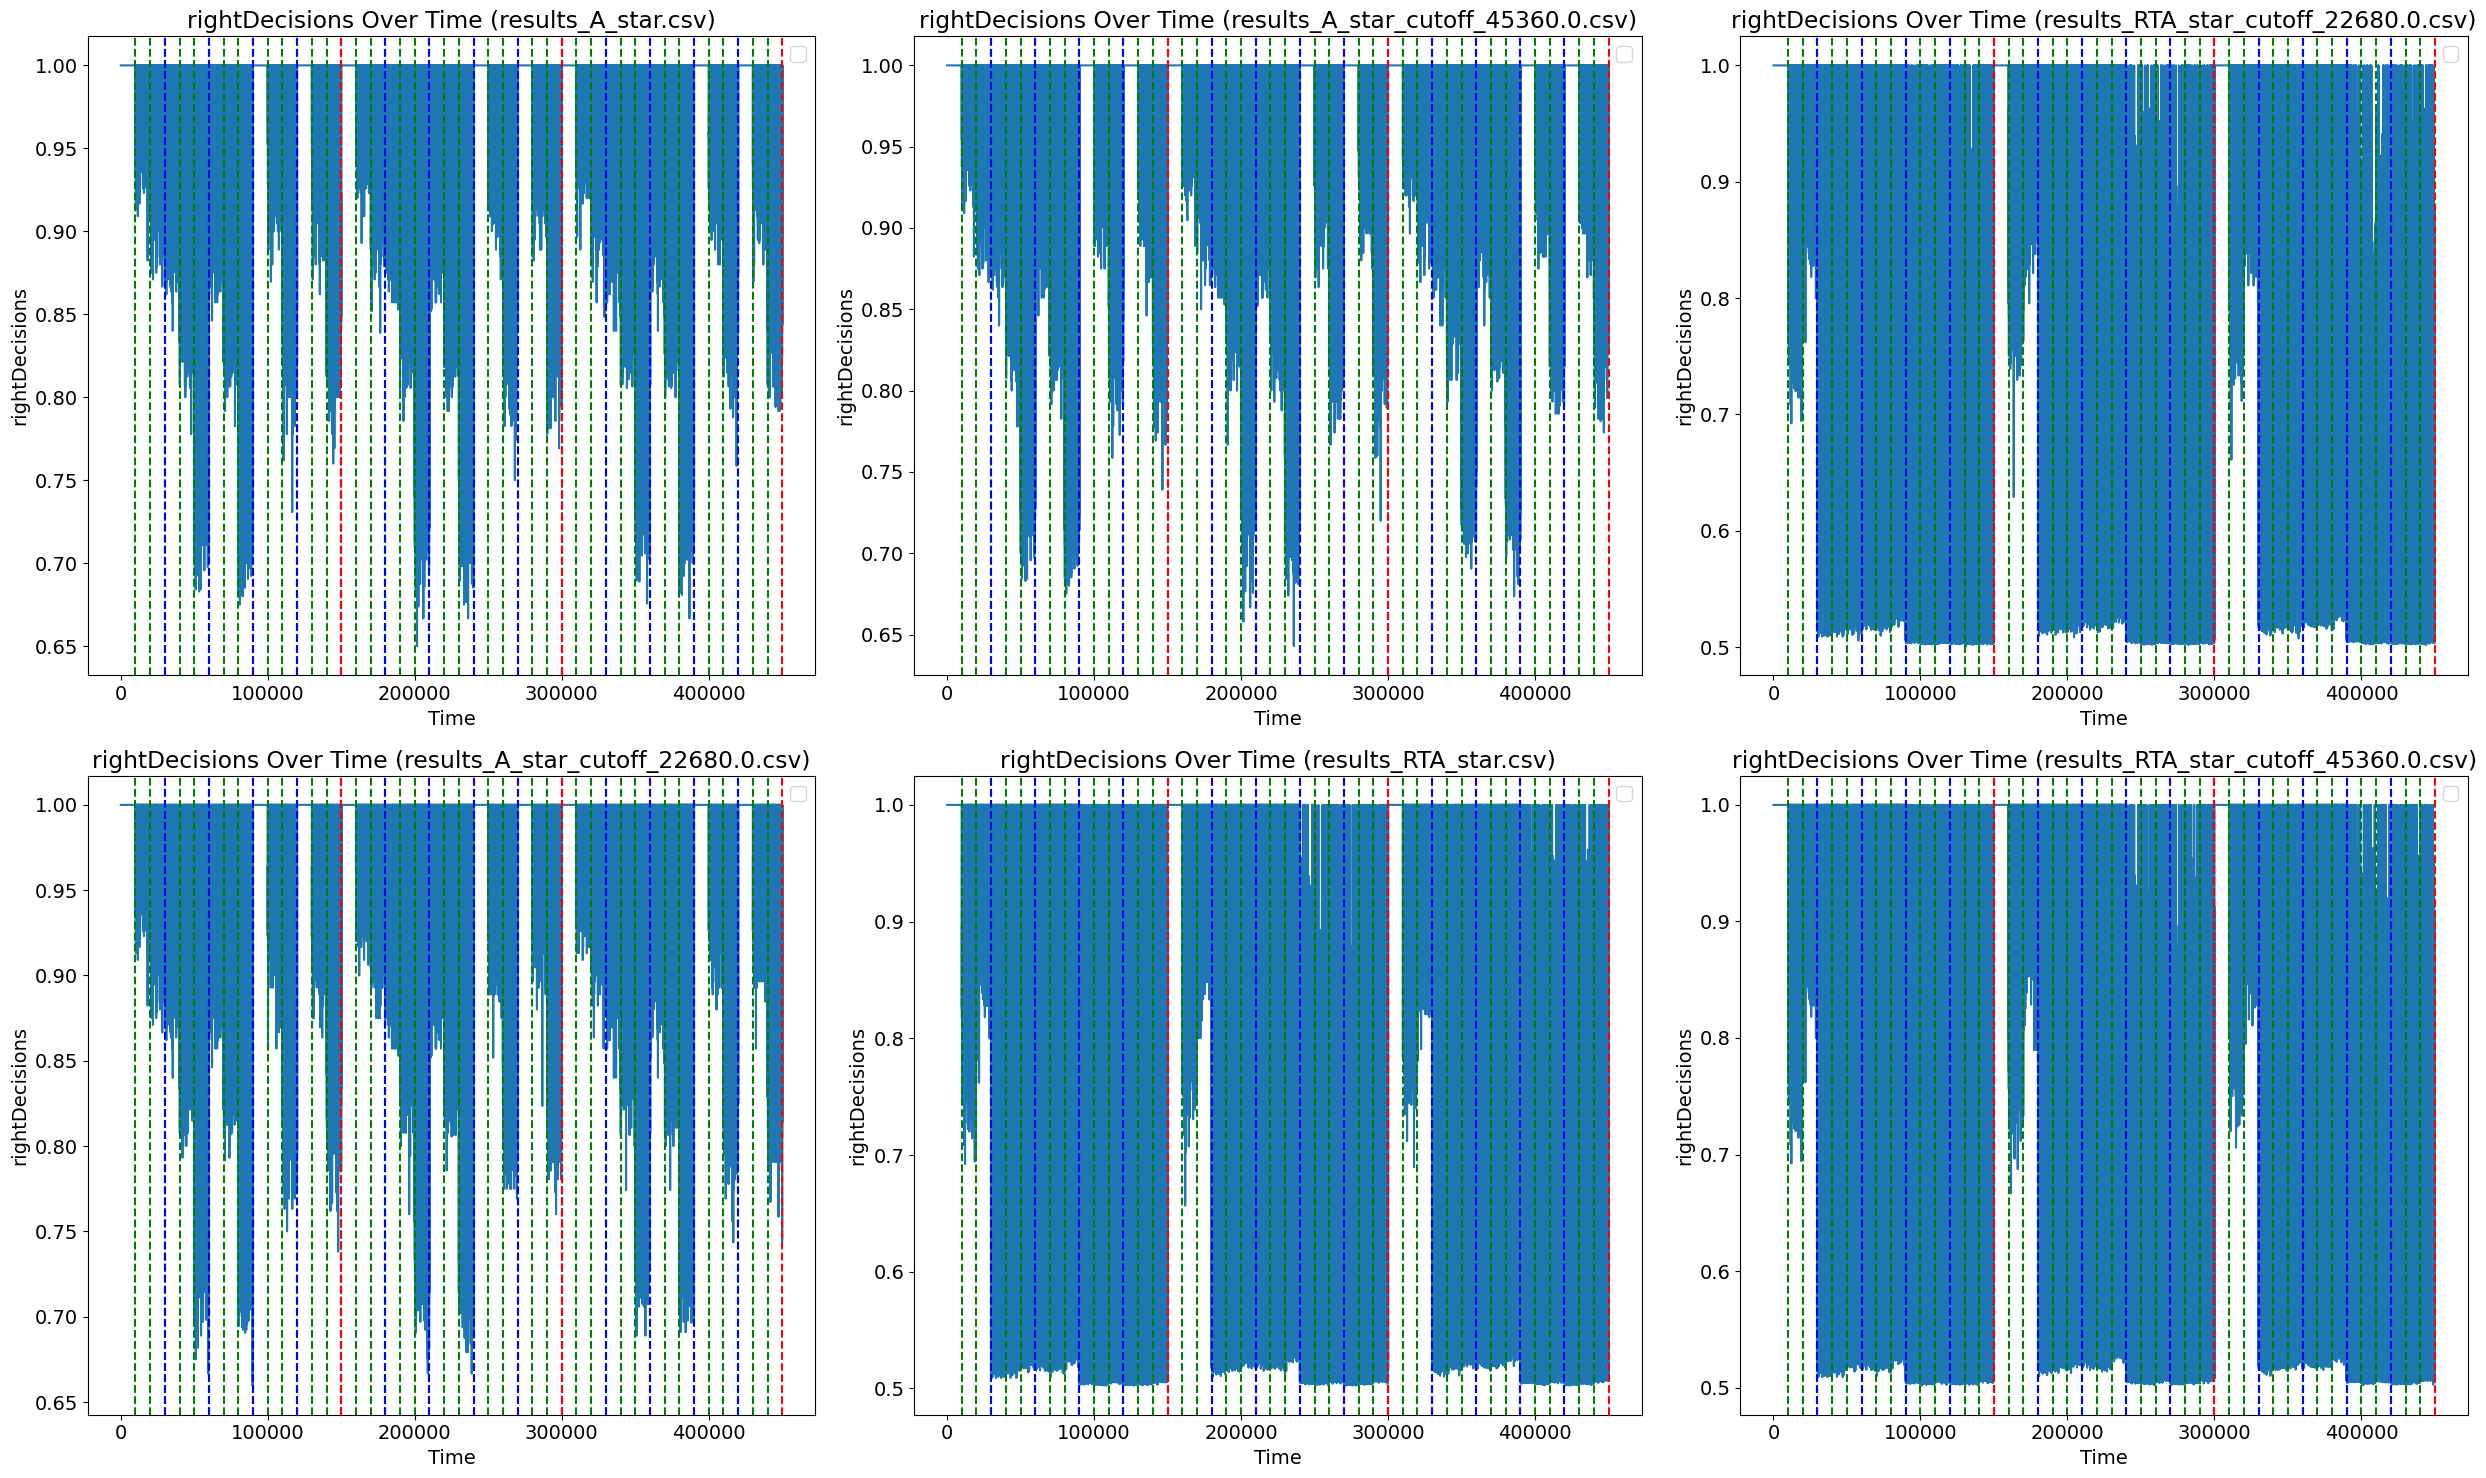

In [10]:
grapher_per_col(data_map, 'rightDecisions')